In [89]:
# Basic Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preprocessing
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MultiLabelBinarizer
from sklearn.utils import resample

# New for Balancing
#%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

# New for Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector

# Feature Importance
%pip install shap
import shap
shap.initjs()

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# New classifier
#%pip install xgboost
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate


#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.


## research questions: 
1. How well does machine learning predict children’s happiness based on mobile phone usage and the level of attention in Burkina Faso?
2. What is the relationship between mobile phone usage and children’s attention levels in a context of how long they have had a mobile phone?

In [105]:
# Load data set
df = pd.read_csv('BF_ML_ready.csv')
df

,ID,Age,Class,Sex_binary,Attention_Score,Happiness_Score,PhoneUse_Score,A1,A2,A3,...,T12,T13,T14,school every day,share phone family,electricity at home,parents rules phone,Phone purpose,Phone_total_months,Has_phone
0,1,15,10,1,2.266667,3.166667,4.583333,1,4,1,...,4,0.0,4.0,0,0,1,0,Communication,4.0,1.0
1,2,14,10,0,3.000000,3.583333,4.250000,1,4,4,...,4,1.0,0.0,0,0,0,0,"School, Games",12.0,1.0
2,3,14,10,1,1.333333,3.000000,1.083333,1,1,1,...,1,0.0,0.0,0,0,0,0,Communication,0.0,0.0
3,4,15,10,1,2.000000,2.916667,3.916667,1,1,4,...,3,1.0,0.0,0,1,0,0,School,12.0,1.0
4,5,16,10,0,2.066667,2.666667,3.833333,3,3,1,...,2,16.0,0.0,0,0,1,0,Communication,192.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,670,22,13,1,1.333333,2.666667,3.166667,1,1,1,...,4,1.0,0.0,0,0,0,0,Communication,12.0,1.0
668,671,18,13,1,1.733333,2.750000,3.583333,1,1,1,...,6,6.0,0.0,0,0,1,0,Music,72.0,1.0
669,672,20,13,1,2.333333,2.333333,3.500000,1,2,1,...,4,3.0,6.0,0,0,0,0,Communication,42.0,1.0
670,673,20,13,1,2.000000,2.833333,2.250000,1,4,1,...,1,0.0,1.0,0,0,0,0,School,1.0,1.0


In [106]:
##dropping all the Happiness items features except for the Happiness average score
df.drop(columns=['ID','H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12'], inplace=True)
df.head(10)

,Age,Class,Sex_binary,Attention_Score,Happiness_Score,PhoneUse_Score,A1,A2,A3,A4,...,T12,T13,T14,school every day,share phone family,electricity at home,parents rules phone,Phone purpose,Phone_total_months,Has_phone
0,15,10,1,2.266667,3.166667,4.583333,1,4,1,1,...,4,0.0,4.0,0,0,1,0,Communication,4.0,1.0
1,14,10,0,3.000000,3.583333,4.250000,1,4,4,3,...,4,1.0,0.0,0,0,0,0,"School, Games",12.0,1.0
2,14,10,1,1.333333,3.000000,1.083333,1,1,1,1,...,1,0.0,0.0,0,0,0,0,Communication,0.0,0.0
3,15,10,1,2.000000,2.916667,3.916667,1,1,4,1,...,3,1.0,0.0,0,1,0,0,School,12.0,1.0
4,16,10,0,2.066667,2.666667,3.833333,3,3,1,2,...,2,16.0,0.0,0,0,1,0,Communication,192.0,1.0
5,16,10,1,1.933333,2.916667,4.333333,1,1,2,1,...,6,0.0,0.0,0,0,0,1,School,0.0,0.0
6,15,10,0,2.400000,2.750000,2.583333,3,4,1,3,...,1,2.0,4.0,0,0,0,0,"Games, Other",28.0,1.0
7,18,10,0,2.066667,3.166667,4.500000,1,2,2,1,...,4,2.0,0.0,0,0,0,0,Communication,24.0,1.0
8,16,10,1,2.466667,3.083333,4.166667,1,1,4,4,...,5,0.0,2.0,0,0,0,0,Music,2.0,1.0
9,16,10,0,2.000000,2.666667,2.916667,1,1,1,1,...,1,14.0,0.0,0,1,0,0,School,168.0,1.0


## Encoding
Encoding Happiness score into binary number 

In [107]:


# Step 2: Convert Happiness_Score into ordinal bins (0, 1,)
df['Happiness_Level'] = pd.cut(
    df['Happiness_Score'],
    bins=[0.00, 2.90, 4.00],
    labels=[0, 1,],
    include_lowest=True,
    right=True
).astype(int)

# Step 3: (Optional) drop the continuous score if you only want the ordinal level
df = df.drop(columns=['Happiness_Score'])

# Check result
print(df[['Happiness_Level']].head())
print(df[['Happiness_Level']].value_counts())
df


   Happiness_Level
0                1
1                1
2                1
3                1
4                0
Happiness_Level
0                  391
1                  281
Name: count, dtype: int64


,Age,Class,Sex_binary,Attention_Score,PhoneUse_Score,A1,A2,A3,A4,A5,...,T13,T14,school every day,share phone family,electricity at home,parents rules phone,Phone purpose,Phone_total_months,Has_phone,Happiness_Level
0,15,10,1,2.266667,4.583333,1,4,1,1,3,...,0.0,4.0,0,0,1,0,Communication,4.0,1.0,1
1,14,10,0,3.000000,4.250000,1,4,4,3,4,...,1.0,0.0,0,0,0,0,"School, Games",12.0,1.0,1
2,14,10,1,1.333333,1.083333,1,1,1,1,1,...,0.0,0.0,0,0,0,0,Communication,0.0,0.0,1
3,15,10,1,2.000000,3.916667,1,1,4,1,3,...,1.0,0.0,0,1,0,0,School,12.0,1.0,1
4,16,10,0,2.066667,3.833333,3,3,1,2,1,...,16.0,0.0,0,0,1,0,Communication,192.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,22,13,1,1.333333,3.166667,1,1,1,1,2,...,1.0,0.0,0,0,0,0,Communication,12.0,1.0,0
668,18,13,1,1.733333,3.583333,1,1,1,1,4,...,6.0,0.0,0,0,1,0,Music,72.0,1.0,0
669,20,13,1,2.333333,3.500000,1,2,1,1,3,...,3.0,6.0,0,0,0,0,Communication,42.0,1.0,0
670,20,13,1,2.000000,2.250000,1,4,1,1,1,...,0.0,1.0,0,0,0,0,School,1.0,1.0,0


## Encoding: phone_purpose in different features

In [108]:

# --- prefix + labels ---
PREFIX = "phone purpose: "
base_labels = ["School", "Communication", "Games", "Social Media", "Music"]
phone_cols = [f"{PREFIX}{c}" for c in base_labels]
other_col  = f"{PREFIX}Other"

# ---- helper: normalize & split ----
variant_map = {
    "school":"School","study":"School","education":"School",
    "communication":"Communication","call":"Communication","calls":"Communication",
    "chat":"Communication","messaging":"Communication","texting":"Communication","sms":"Communication","whatsapp":"Communication",
    "games":"Games","game":"Games","gaming":"Games",
    "social media":"Social Media","social":"Social Media","instagram":"Social Media","facebook":"Social Media","tiktok":"Social Media","snapchat":"Social Media",
    "music":"Music","songs":"Music","spotify":"Music","audio":"Music",
    "other":"Other",
}
def normalize_and_split(x):
    if pd.isna(x): return []
    toks = [t.strip() for t in str(x).replace(";", ",").split(",") if t.strip() != ""]
    out = []
    for t in toks:
        k = " ".join(t.lower().split())
        out.append(variant_map.get(k, t))
    return out

# the column name
col = "Phone purpose" 

# 1) lists of purposes
lists = df[col].apply(normalize_and_split)

# 2) multi-hot for the 5 known categories
mlb = MultiLabelBinarizer(classes=base_labels)
multi = mlb.fit_transform(lists)
multi_df = pd.DataFrame(multi, columns=phone_cols, index=df.index).astype("int8")

# 3) "Other" (prefixed!)
known = set(base_labels)
multi_df[other_col] = lists.apply(
    lambda items: int(any((it not in known) or (it == "Other") for it in items))
).astype("int8")

# 4) merge
df_encoded = pd.concat([df.drop(columns=[col]), multi_df], axis=1)

# sanity check: these columns should now exist
df_encoded[phone_cols + [other_col]].head()

# --- Drop the original column if it still exists ---
if "Phone purpose" in df.columns:
    df = df.drop(columns=["Phone purpose"])

# --- Combine (merge) the new encoded data with your main df ---
# Assuming df_encoded was built from df originally, we can align by index:
df_final = pd.concat([df, df_encoded.filter(like="phone purpose:")], axis=1)

# --- Optional: sanity check ---
print("✅ Combined DataFrame shape:", df_final.shape)
print("✅ Columns added:", [c for c in df_final.columns if c.startswith("phone purpose:")])
df_final.head()


✅ Combined DataFrame shape: (672, 47)
✅ Columns added: ['phone purpose: School', 'phone purpose: Communication', 'phone purpose: Games', 'phone purpose: Social Media', 'phone purpose: Music', 'phone purpose: Other']


,Age,Class,Sex_binary,Attention_Score,PhoneUse_Score,A1,A2,A3,A4,A5,...,parents rules phone,Phone_total_months,Has_phone,Happiness_Level,phone purpose: School,phone purpose: Communication,phone purpose: Games,phone purpose: Social Media,phone purpose: Music,phone purpose: Other
0,15,10,1,2.266667,4.583333,1,4,1,1,3,...,0,4.0,1.0,1,0,1,0,0,0,0
1,14,10,0,3.000000,4.250000,1,4,4,3,4,...,0,12.0,1.0,1,1,0,1,0,0,0
2,14,10,1,1.333333,1.083333,1,1,1,1,1,...,0,0.0,0.0,1,0,1,0,0,0,0
3,15,10,1,2.000000,3.916667,1,1,4,1,3,...,0,12.0,1.0,1,1,0,0,0,0,0
4,16,10,0,2.066667,3.833333,3,3,1,2,1,...,0,192.0,1.0,0,0,1,0,0,0,0


In [109]:
# Separating data and target variable 
# target variable
y = df['Happiness_Level']

# data without target variable
X = df.drop(columns='Happiness_Level')
print(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)
y.value_counts(normalize=True)
#results require balancing 
df=df_final.copy()


     Age  Class  Sex_binary  Attention_Score  PhoneUse_Score  A1  A2  A3  A4  \
0     15     10           1         2.266667        4.583333   1   4   1   1   
1     14     10           0         3.000000        4.250000   1   4   4   3   
2     14     10           1         1.333333        1.083333   1   1   1   1   
3     15     10           1         2.000000        3.916667   1   1   4   1   
4     16     10           0         2.066667        3.833333   3   3   1   2   
..   ...    ...         ...              ...             ...  ..  ..  ..  ..   
667   22     13           1         1.333333        3.166667   1   1   1   1   
668   18     13           1         1.733333        3.583333   1   1   1   1   
669   20     13           1         2.333333        3.500000   1   2   1   1   
670   20     13           1         2.000000        2.250000   1   4   1   1   
671   20     13           1         1.733333        5.583333   1   1   4   1   

     A5  ...  T11  T12   T13  T14  scho

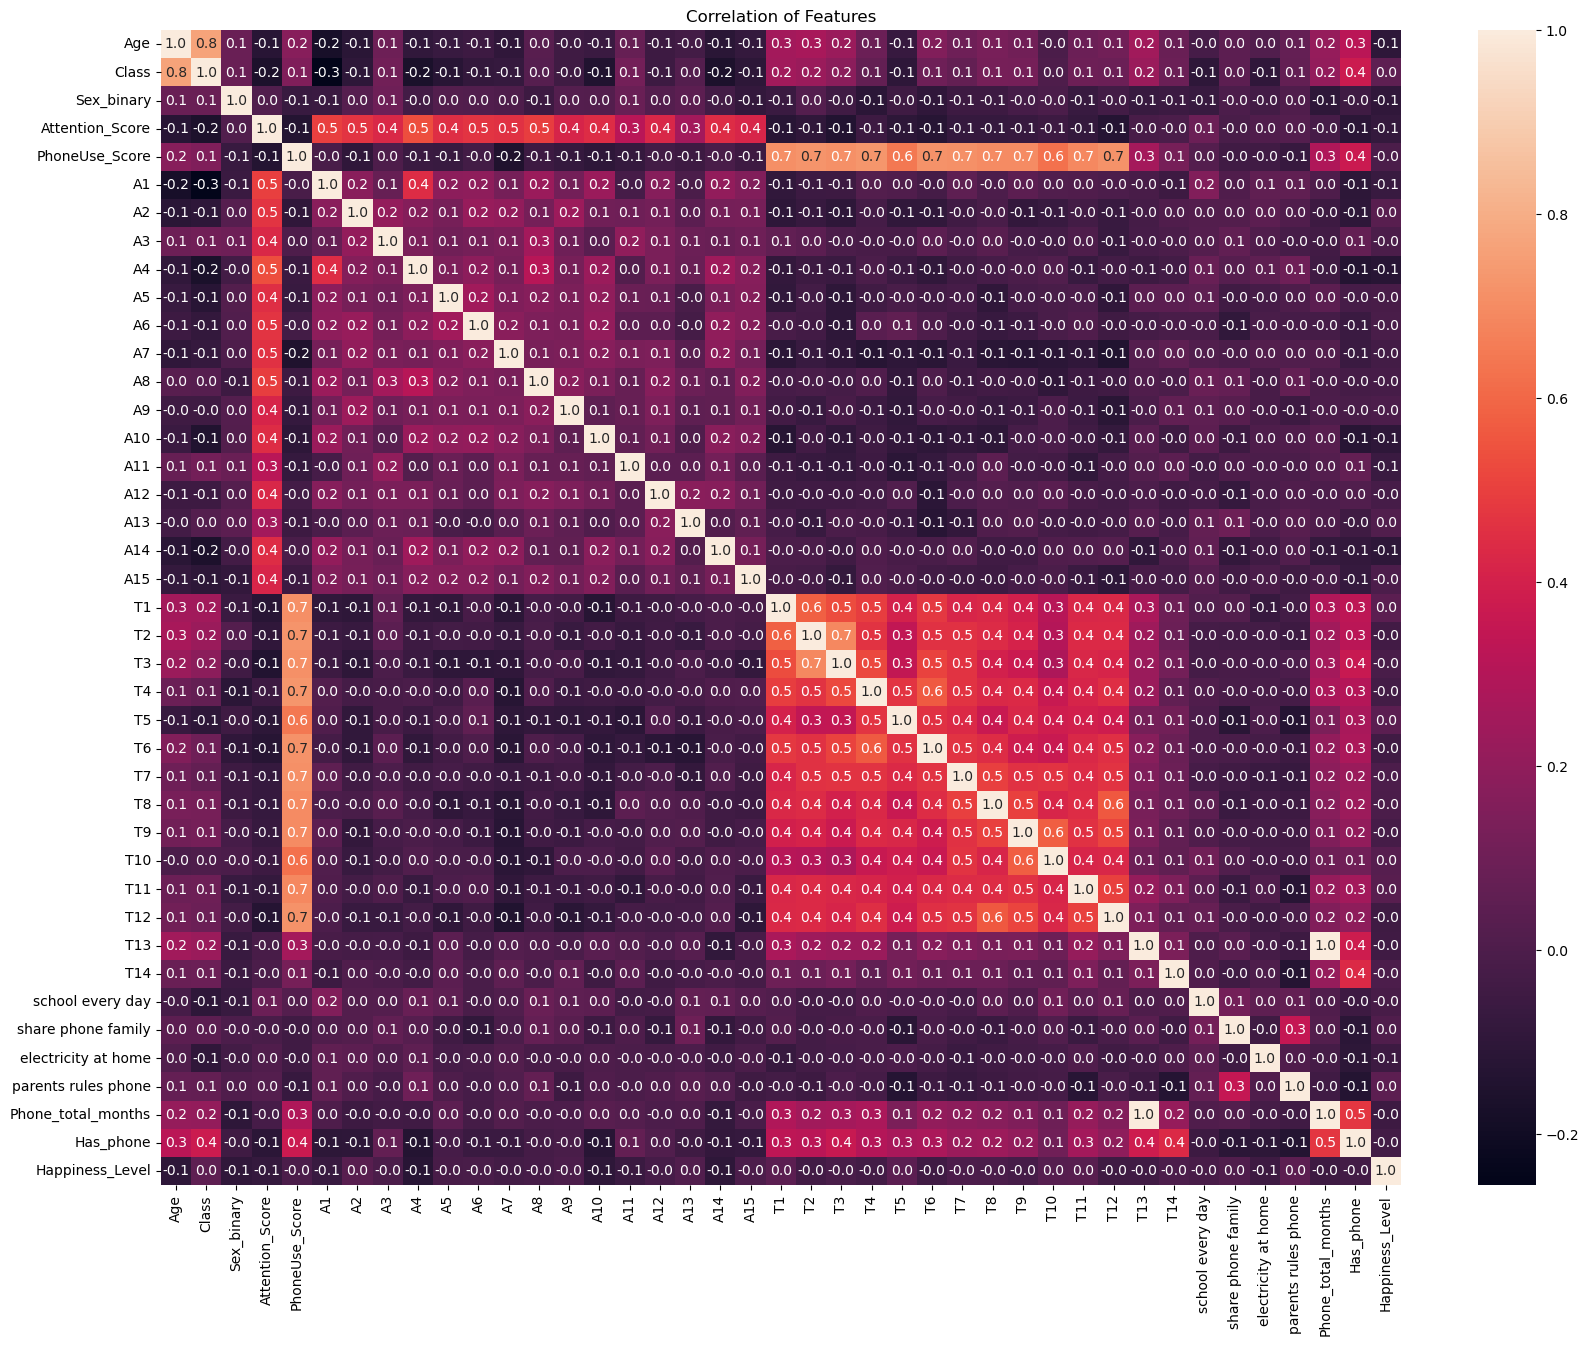

,A4,A10,Age,A14,Sex_binary,Attention_Score,A1,A11,electricity at home,Phone_total_months
439,1,3,15,4,0,2.666667,4,4,1,0.0
129,2,3,15,2,1,2.133333,3,1,1,132.0
466,1,4,14,4,1,2.333333,1,3,0,2.0
500,1,1,13,2,1,1.733333,1,4,0,171.0
521,1,1,16,4,1,1.533333,1,1,0,48.0
422,1,2,15,2,1,2.266667,1,4,0,3.0
165,1,1,12,1,0,1.666667,1,4,0,0.0
139,1,4,12,2,1,2.000000,4,2,1,0.0
657,1,1,19,3,1,2.800000,3,4,0,96.0
474,1,1,14,1,1,2.533333,1,1,0,3.0


In [110]:
y_train_named = y_train.rename('Happiness_Level')   # <- IMPORTANT

# 1) Combine X and y for correlation (train only)
df_train = pd.concat([X_train, y_train_named], axis=1)

# 2) Correlation heatmap (optional)
plt.figure(figsize=(20, 15))
correlation_matrix = df_train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
plt.title('Correlation of Features')
plt.show()

# 3) Rank features by absolute correlation with the target (drop the target itself)
corr_with_target = (
    correlation_matrix['Happiness_Level']
    .drop('Happiness_Level')            # <- remove target so it doesn't end up in top list
    .abs()
    .sort_values(ascending=False)
)

# 4) Choose exactly top 10 feature names
top_10 = corr_with_target.head(10).index

# 5) Guard against typos/mismatch (optional, but safe)
top_10 = [c for c in top_10 if c in X_train.columns]




#plt.figure(figsize=(15, 10))
#correlation_matrix = df_train.corr()
#sns.heatmap(correlation_matrix, annot=True, fmt=".1f")
#plt.title('Correlation of Features')
#plt.show()

#top_10 = correlation_matrix['Happiness_Level'].abs().sort_values(ascending=False)[:11].index
df_correlation = df_train[top_10]
df_correlation.head(10)

# Merge target for correlation
#train_corr = X_train.copy()
#train_corr['Happiness_Level'] = y_train

# Compute correlation
#corr = train_corr.corr()['Happiness_Level'].abs().sort_values(ascending=False)

#corr_with_target = train_corr.corr(numeric_only=True)['Happiness_Level'].drop('Happiness_Level')
#corr_with_target_abs = corr_with_target.abs().sort_values(ascending=False)

#print("Top correlations with Happiness_Level:\n")
#print(corr_with_target_abs.head(15))



## Balancing 
Not required to balance accodring to Luka 

In [111]:

#X_train_sel = X_train[top_10]
#X_test_sel  = X_test[top_10]

#Fill in all NaN values with 0 
#X_train_sel = X_train_sel.fillna(0)
#X_test_sel  = X_test_sel.fillna(0)

#df_smote = SMOTE(random_state=42, k_neighbors=3)
#X_train_bal, y_train_bal = df_smote.fit_resample(X_train_sel, y_train)

#print("Before balancing:", Counter(y_train))
#print("After balancing:", Counter(y_train_bal))




In [112]:


#X_train = X_train.fillna(0)
#X_test  = X_test.fillna(0)

#X_train_sel = X_train[top_10]
#X_test_sel = X_test[top_10]


# Apply SMOTE only to the training set
#df_smote = SMOTE(random_state=42, k_neighbors=3)  
#X_train_bal, y_train_bal = df_smote.fit_resample(X_train_sel, y_train)

#print("Before balancing:", Counter(y_train))
#print("After balancing:", Counter(y_train_bal))

##Hyperparameter optimization (Random Forest)

#dt_base = DecisionTreeClassifier(random_state=42)
#dt_base.fit(X_train_bal, y_train_bal)
#y_pred_base = dt_base.predict(X_test_bal)
#print("Baseline F1 (macro):", f1_score(y_test, y_pred_base, average='macro'))

# 2) Define parameter grid (similar to your example)
#param_grid = [{
   # 'criterion': ['gini', 'entropy'],
    #'splitter': ['best'],
    #'max_depth': [5, 10, 15, 20, None],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': [None, 'sqrt'],
    #'class_weight': [None, 'balanced']

#grid = RandomizedSearchCV(
 #   estimator=DecisionTreeClassifier(random_state=42),
  #  param_distributions=param_grid[0],
   # n_iter=50,              # test 50 random combos
   # cv=5,
   # scoring='f1_macro',
   # n_jobs=-1,
    #random_state=42,

## Classification
Finding out which works best

In [113]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train, y_train)

best_dt = search.best_estimator_
print("Best parameters:", search.best_params_)
print("Best CV F1:", search.best_score_)

# Evaluate on test set
y_pred = best_dt.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}
Best CV F1: 0.5314959215554765
              precision    recall  f1-score   support

           0      0.573     0.544     0.558        79
           1      0.400     0.429     0.414        56

    accuracy                          0.496       135
   macro avg      0.487     0.486     0.486       135
weighted avg      0.501     0.496     0.498       135



In [114]:

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train, y_train)

best_rf = search.best_estimator_
print("Best parameters:", search.best_params_)
print("Best CV F1:", search.best_score_)

# Evaluate
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best CV F1: 0.4986575608103047
              precision    recall  f1-score   support

           0      0.657     0.873     0.750        79
           1      0.667     0.357     0.465        56

    accuracy                          0.659       135
   macro avg      0.662     0.615     0.608       135
weighted avg      0.661     0.659     0.632       135



In [115]:

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1, 1.5, 2]
}

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
search.fit(X_train, y_train)

best_xgb = search.best_estimator_
print("Best parameters:", search.best_params_)
print("Best CV F1:", search.best_score_)

# Evaluate on test
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': 0.7, 'reg_lambda': 1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best CV F1: 0.5475404305466088
              precision    recall  f1-score   support

           0      0.655     0.722     0.687        79
           1      0.542     0.464     0.500        56

    accuracy                          0.615       135
   macro avg      0.598     0.593     0.593       135
weighted avg      0.608     0.615     0.609       135



### Hyperparameter tuning 

Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Decision Tree ===
Best params: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
Best CV F1: 0.5424
[[46 33]
 [30 26]]


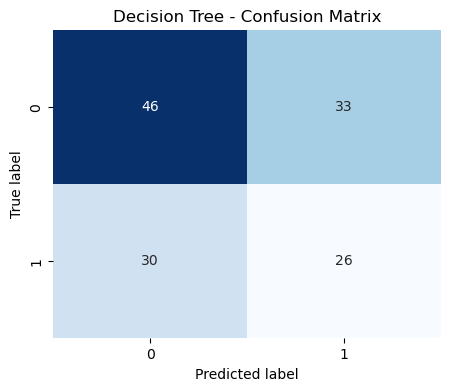

Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Random Forest ===
Best params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best CV F1: 0.5068
[[66 13]
 [37 19]]


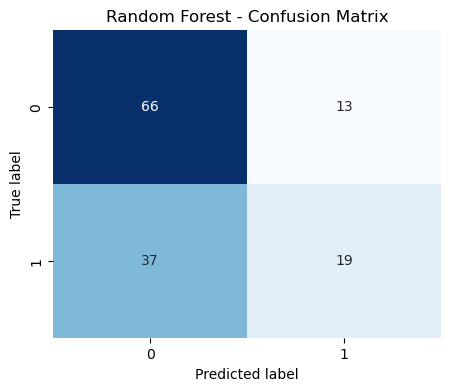

Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== XGBoost ===
Best params: {'subsample': 0.8, 'reg_lambda': 1.5, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}
Best CV F1: 0.5929
[[53 26]
 [31 25]]


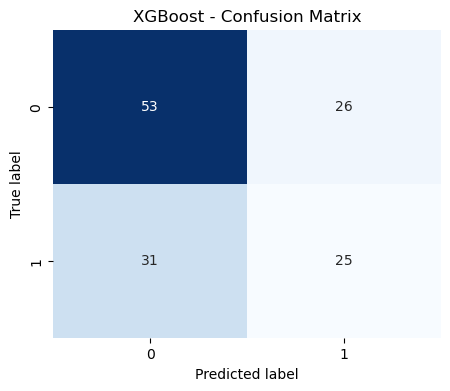


=== Model Comparison (Test Set) ===
        Model  Accuracy  Precision(macro)  Recall(macro)  F1(macro)
 RandomForest  0.629630          0.617263       0.587364   0.578546
XGBClassifier  0.577778          0.560574       0.558657   0.558798
 DecisionTree  0.533333          0.522971       0.523282   0.522861


In [116]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# ---------------- Decision Tree ----------------
dt = DecisionTreeClassifier(random_state=42)
dt_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}
dt_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=dt_param,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
dt_search.fit(X_train, y_train)
best_dt = dt_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("\n=== Decision Tree ===")
print("Best params:", dt_search.best_params_)
print("Best CV F1:", round(dt_search.best_score_, 4))
print(confusion_matrix(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


results.append({
    'Model': 'DecisionTree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision(macro)': precision_score(y_test, y_pred_dt, average='macro', zero_division=0),
    'Recall(macro)': recall_score(y_test, y_pred_dt, average='macro', zero_division=0),
    'F1(macro)': f1_score(y_test, y_pred_dt, average='macro', zero_division=0),
})

# ---------------- Random Forest ----------------
rf = RandomForestClassifier(random_state=42)
rf_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\n=== Random Forest ===")
print("Best params:", rf_search.best_params_)
print("Best CV F1:", round(rf_search.best_score_, 4))
print(confusion_matrix(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


results.append({
    'Model': 'RandomForest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision(macro)': precision_score(y_test, y_pred_rf, average='macro', zero_division=0),
    'Recall(macro)': recall_score(y_test, y_pred_rf, average='macro', zero_division=0),
    'F1(macro)': f1_score(y_test, y_pred_rf, average='macro', zero_division=0),
})

# ---------------- XGBoost ----------------
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [1.0, 1.5, 2.0],
}
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("\n=== XGBoost ===")
print("Best params:", xgb_search.best_params_)
print("Best CV F1:", round(xgb_search.best_score_, 4))
print(confusion_matrix(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

results.append({
    'Model': 'XGBClassifier',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision(macro)': precision_score(y_test, y_pred_xgb, average='macro', zero_division=0),
    'Recall(macro)': recall_score(y_test, y_pred_xgb, average='macro', zero_division=0),
    'F1(macro)': f1_score(y_test, y_pred_xgb, average='macro', zero_division=0),
})

# ---------------- Comparison table ----------------
results_df = pd.DataFrame(results).sort_values('F1(macro)', ascending=False).reset_index(drop=True)
print("\n=== Model Comparison (Test Set) ===")
print(results_df.to_string(index=False))

Accuracy: 0.5185185185185185


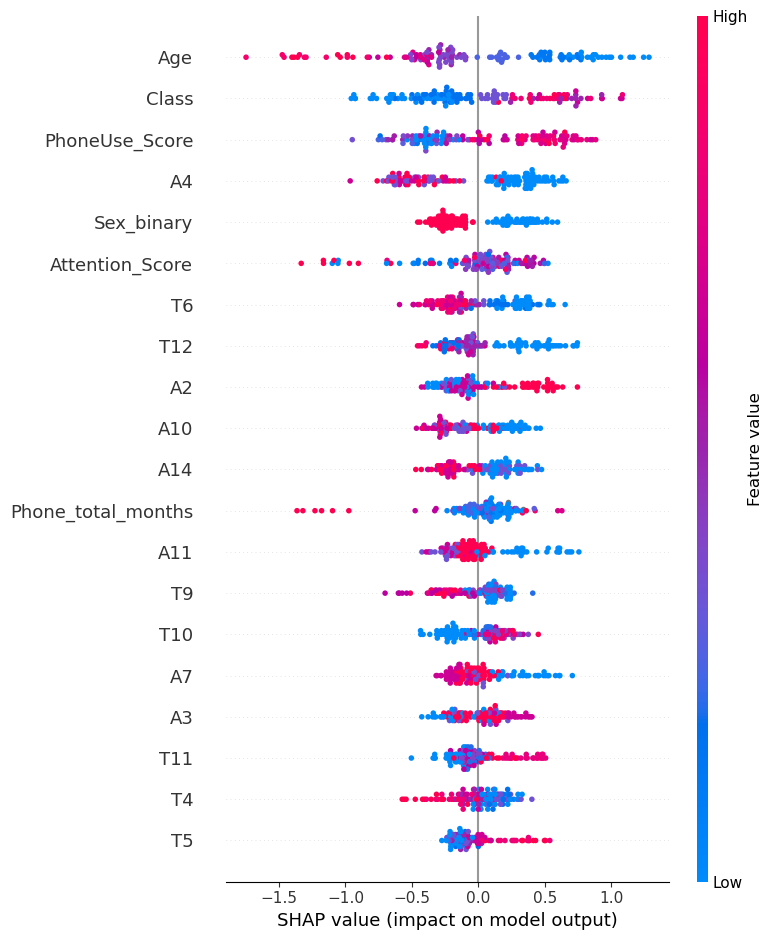

In [117]:
##Global
clf = XGBClassifier(max_depth=3, n_estimators=100)

# Train Model
clf.fit(X_train, y_train)

# Classify new examples
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Initialize the SHAP explainer
explainer = shap.Explainer(clf)
shap_values = explainer(X_test)


# Plot the summary plot
shap.summary_plot(shap_values, X_test)

In [120]:
print("Participant at index position 0:")
print("Predicted as:", y_pred[0], "= Malignant")
print(X_test.iloc[0])

Participant at index position 0:
Predicted as: 1 = Malignant
Age                    14.000000
Class                   7.000000
Sex_binary              0.000000
Attention_Score         2.066667
PhoneUse_Score          2.083333
A1                      1.000000
A2                      1.000000
A3                      4.000000
A4                      1.000000
A5                      3.000000
A6                      1.000000
A7                      3.000000
A8                      1.000000
A9                      4.000000
A10                     4.000000
A11                     1.000000
A12                     1.000000
A13                     3.000000
A14                     2.000000
A15                     1.000000
T1                      2.000000
T2                      2.000000
T3                      2.000000
T4                      2.000000
T5                      3.000000
T6                      1.000000
T7                      4.000000
T8                      2.000000
T9             

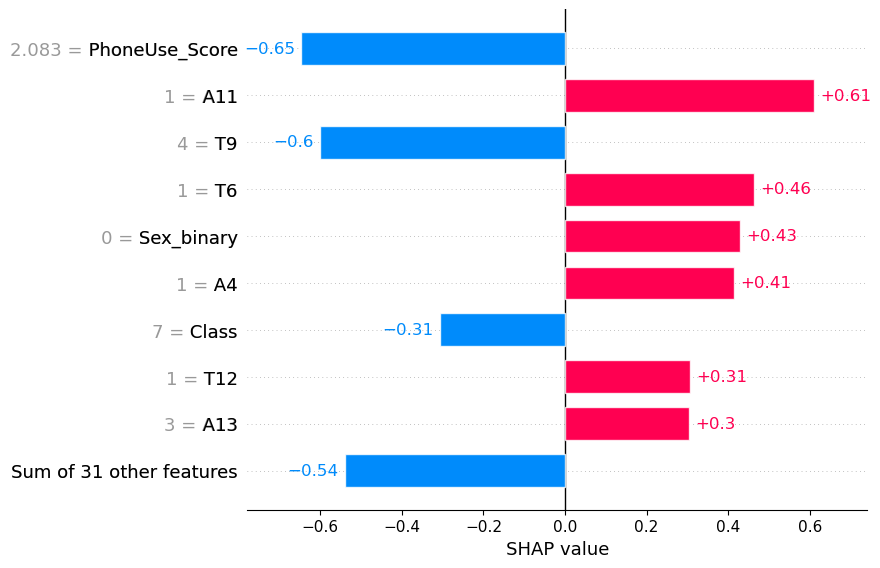

In [118]:
shap.plots.bar(shap_values[0])

In [119]:
shap.plots.force(shap_values[0])